# AUTOMOBILE IMPORTS PRICE PREDICTION  

## DESCRIPTION

- This is an Automobile Imports Data Set which contains various characteristics of the cars including insurance risk rating and other price indicators. The target is to predict the price of the cars.

## BUSSINESS PROBLEM
- Creating a regression model that can predict the price of an automobile based on the individual parts, performance, and insurance costs. 


## INPUT VARIABLES

    symboling: [its assigned insurance risk rating -> [-3, -2, -1, 0, 1, 2, 3]]
    normalized-losses: [average loss payment per insured vehicle year -> continuous from 65 to 256.]
    make: [ Manufacturer name eg : alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu etc. ]
    fuel-type: [diesel, gas]
    aspiration: [std, turbo] - turbo charger improves the engine performance.
    num-of-doors: [four, two] - generally 2 door cars are supercars which are relatively expensive.
    body-style: [hardtop, wagon, sedan, hatchback, convertible] - Convertibles are luxury cars, sedan>wagon>hardtop>hatchback.
    drive-wheels: [4wd, fwd, rwd] - 4wd means all wheels are powered, fwd is front wheel drive and rwd means rear wheel drive.
    engine-location: [front, rear] - this effects the power distribution over the vehicle.
    wheel-base: [continuous from 86.6 120.9] - the distance between front and rear axles.
    length: [continuous from 141.1 to 208.1]
    width: [continuous from 60.3 to 72.3]
    height: [continuous from 47.8 to 59.8]
    curb-weight: [continuous from 1488 to 4066]
    engine-type: [dohc, dohcv, l, ohc, ohcf, ohcv, rotor]
    num-of-cylinders: [eight, five, four, six, three, twelve, two] - this shows the size of engine & how it is distributed.
    engine-size: [continuous from 61 to 326] 
    fuel-system: [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi]
    bore: [continuous from 2.54 to 3.94]
    stroke: [continuous from 2.07 to 4.17]
    compression-ratio: [continuous from 7 to 23]
    horsepower: [continuous from 48 to 288]
    peak-rpm: [continuous from 4150 to 6600]
    city-mpg: [continuous from 13 to 49]
    highway-mpg: [continuous from 16 to 54]

    Output Variable price: [continuous from 5118 to 45400]


In [1]:
# IMPORT PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# Importing data
data = pd.read_csv("auto_imports.csv")

# Exploratory Data Analysis

In [3]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.shape # The data has 201 ROWS and 21 COLUMNS

(201, 26)

In [5]:
# The data contains "?" symbols. So replace this symbols to NAN Values.
data = data.replace('?', np.nan)

In [6]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
#Analyse the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [8]:
# Converting the variables which are interger but the mpdel is considering it as string
data[['normalized_losses','bore','stroke','horsepower','peak_rpm']] = data[['normalized_losses','bore','stroke','horsepower','peak_rpm']].astype('float64')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [10]:
# Checking the NAN Values
data.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [11]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
sum(data.isnull().any()) # SIX Columns contains NAN Values

6

### Filling the missing values
- If the variable is catogerical values it is filled by mode.
- If the variable is numerical values it is filled by mean.

In [13]:
data["normalized_losses"]= data["normalized_losses"].fillna(data["normalized_losses"].mean())

In [14]:
data["num_of_doors"]= data["num_of_doors"].fillna(data["num_of_doors"].mode()[0])

In [15]:
data["bore"]= data["bore"].fillna(data["bore"].mean())

In [16]:
data["stroke"]= data["stroke"].fillna(data["stroke"].mean())

In [17]:
data["horsepower"]= data["horsepower"].fillna(data["horsepower"].mean())

In [18]:
data["peak_rpm"]= data["peak_rpm"].fillna(data["peak_rpm"].mean())

In [19]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [20]:
# Coping data for redundancy
data1= data.copy()

In [21]:
#Converting all string values to interger values, so the mathematical operations can be performed
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data1.loc[:,['make','fuel_type','aspiration', 'num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system']]=\
data1.loc[:,['make','fuel_type','aspiration', 'num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system']]\
.apply(enc.fit_transform)

In [22]:
data1.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    int32  
 3   fuel_type          201 non-null    int32  
 4   aspiration         201 non-null    int32  
 5   num_of_doors       201 non-null    int32  
 6   body_style         201 non-null    int32  
 7   drive_wheels       201 non-null    int32  
 8   engine_location    201 non-null    int32  
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    int32  
 16  engine_size        201 non

# Visualising the data

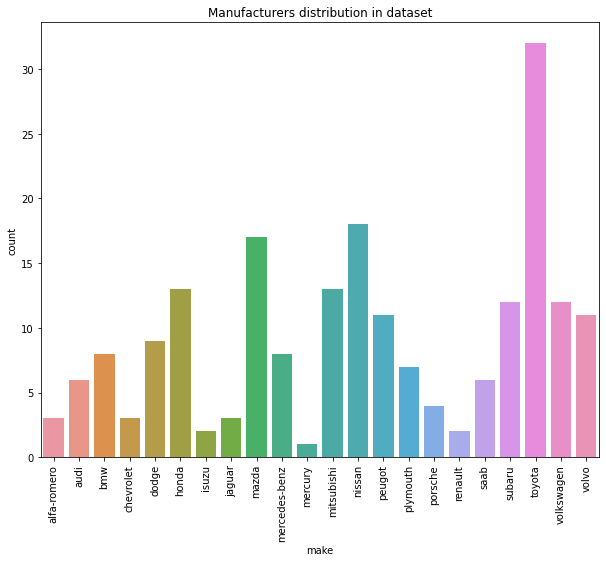

In [24]:
# Checking the data for how it is distributed over the manufacturers
from matplotlib import rcParams
rcParams["figure.figsize"]=10,8
sb.countplot(data["make"])
plt.xticks(rotation=90)
plt.title("Manufacturers distribution in dataset")
plt.show()

### Top selling car is Toyota

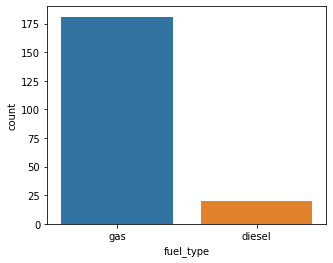

In [25]:
# Countplot bar diagram based on fuel type.
rcParams["figure.figsize"]=5,4
sb.countplot(data["fuel_type"])      # max cars use gas as fuel

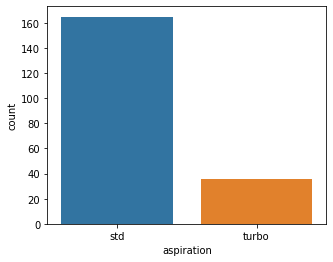

In [26]:
# Countplot bar diagram based on the aspiration
sb.countplot(data["aspiration"])

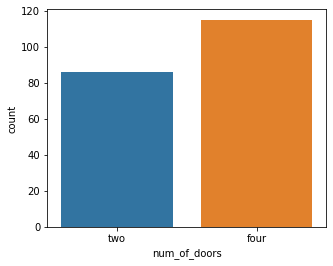

In [27]:
# Countplot bar diagram based on the aspiration
sb.countplot(data["num_of_doors"]) 

In [28]:
data["body_style"].value_counts() #most cars have sedan body style

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [29]:
data["engine_location"].value_counts() #99% cars engine is located front

front    198
rear       3
Name: engine_location, dtype: int64

In [30]:
data["num_of_cylinders"].value_counts() # maximum cars have 4 cylinders

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [31]:
# Finding the correlation between each variable to check for multi collinearity
data1.corr()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,4.662638e-01,-0.129645,0.196735,-0.054615,0.672344,-0.600333,-0.053056,2.123389e-01,-0.535987,...,-0.110581,0.091601,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized_losses,0.466264,1.000000e+00,-0.254356,0.101546,-0.006911,0.361368,-0.251775,0.317214,1.355890e-17,-0.056661,...,0.112360,0.230311,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
make,-0.129645,-2.543563e-01,1.000000,-0.109330,0.071254,-0.146172,0.090621,-0.034844,5.331188e-02,0.073930,...,-0.084770,0.144769,0.236765,-0.203756,0.132554,-0.064598,-0.213009,0.065761,0.059111,-0.163646
fuel_type,0.196735,1.015463e-01,-0.109330,1.000000,-0.408228,0.186681,-0.147654,-0.131096,4.091700e-02,-0.307237,...,-0.070779,0.042824,-0.054435,-0.241033,-0.985231,0.168977,0.475759,-0.265676,-0.198690,-0.110326
aspiration,-0.054615,-6.910980e-03,0.071254,-0.408228,1.000000,-0.063017,0.072079,0.094469,-5.749596e-02,0.256889,...,0.110040,0.282269,0.227782,0.218190,0.307522,0.251235,-0.189982,-0.189237,-0.241851,0.179578
num_of_doors,0.672344,3.613676e-01,-0.146172,0.186681,-0.063017,1.000000,-0.688542,0.115920,1.423403e-01,-0.445245,...,-0.024094,-0.001246,-0.119140,0.007780,-0.169164,0.102856,0.232031,0.027617,0.045787,-0.042435
body_style,-0.600333,-2.517751e-01,0.090621,-0.147654,0.072079,-0.688542,1.000000,-0.161004,-2.783504e-01,0.407128,...,-0.063692,-0.054810,0.021182,-0.013468,0.134622,-0.136575,-0.105785,0.014217,-0.021328,-0.072933
drive_wheels,-0.053056,3.172142e-01,-0.034844,-0.131096,0.094469,0.115920,-0.161004,1.000000,1.493687e-01,0.467661,...,0.526027,0.435926,0.471925,0.078852,0.120125,0.546033,-0.035667,-0.469240,-0.472893,0.588333
engine_location,0.212339,1.355890e-17,0.053312,0.040917,-0.057496,0.142340,-0.278350,0.149369,1.000000e+00,-0.189115,...,0.199367,0.106735,0.188404,-0.139351,-0.020467,0.342146,0.201937,-0.157132,-0.102964,0.331062
wheel_base,-0.535987,-5.666124e-02,0.073930,-0.307237,0.256889,-0.445245,0.407128,0.467661,-1.891150e-01,1.000000,...,0.572027,0.381273,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642


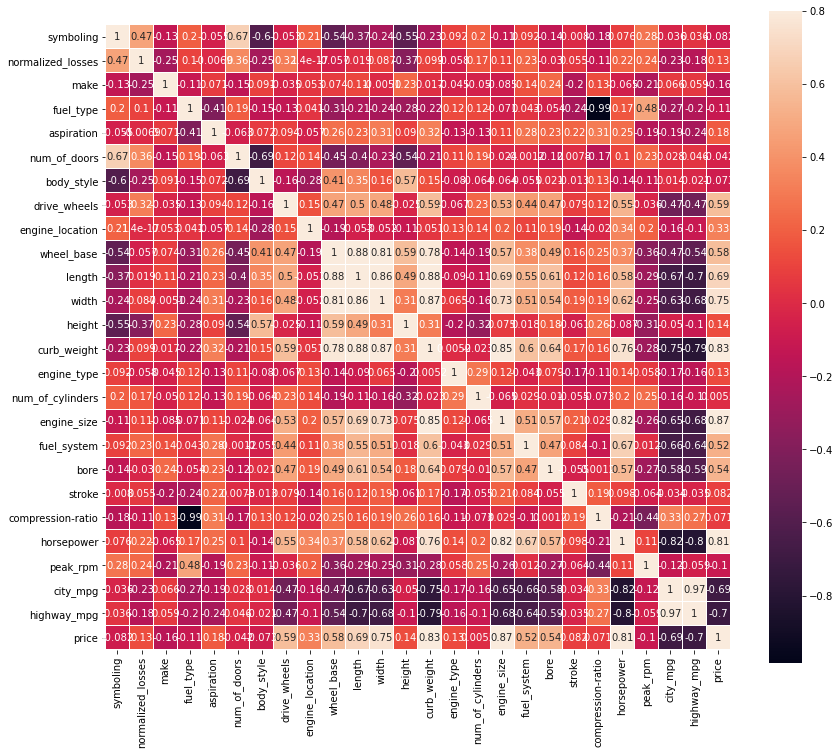

In [32]:
# Visualisation of multi collinearity
rcParams["figure.figsize"]=14,12
sb.heatmap(data1.corr(),annot=True,fmt='.2g',square=True,linewidths=0.01,vmax=.8)
plt.show()

- Above graph shows Wheel base , Length , Width are highly correlated. 
- Highway_mpg and city_mpg is also highly correlated. 
- Compression ratio and fuel type is also correlated 
- Engine size and horse power is also correlated

In [33]:
# Droping the Highly correlated Values (anything >= 0.85)
data1.drop(['length','width','city_mpg','fuel_type','horsepower'],axis=1,inplace=True)

In [34]:
data1.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,height,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression-ratio,peak_rpm,highway_mpg,price
0,3,122.0,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,13495
1,3,122.0,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,16500
2,1,122.0,0,0,1,2,2,0,94.5,52.4,...,4,3,152,5,2.68,3.47,9.0,5000.0,26,16500
3,2,164.0,1,0,0,3,1,0,99.8,54.3,...,2,2,109,5,3.19,3.40,10.0,5500.0,30,13950
4,2,164.0,1,0,0,3,0,0,99.4,54.3,...,2,1,136,5,3.19,3.40,8.0,5500.0,22,17450


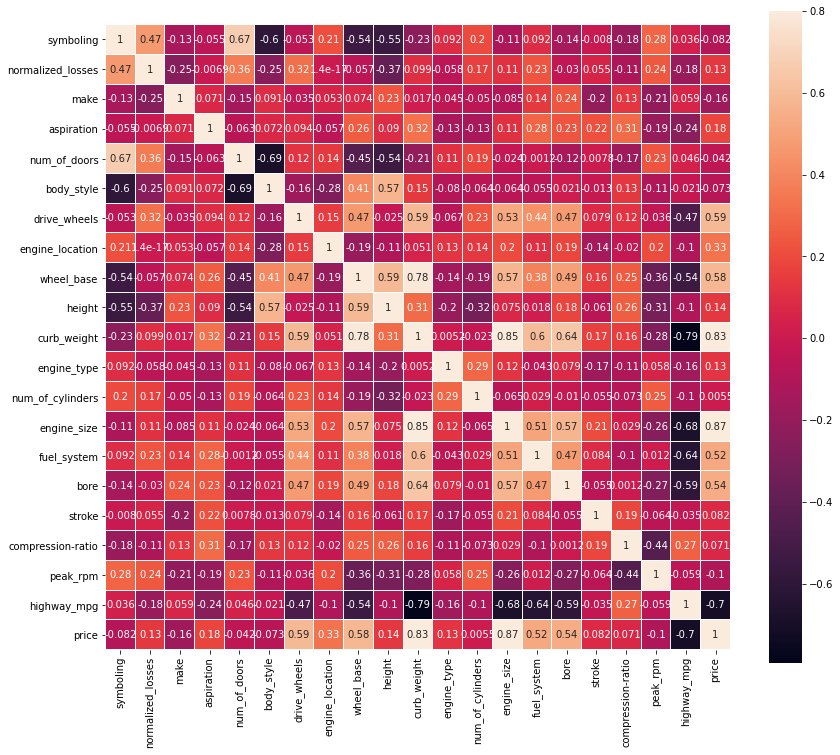

In [35]:
rcParams["figure.figsize"]=14,12
sb.heatmap(data1.corr(),annot=True,fmt='.2g',square=True,linewidths=0.01,vmax=.8)
plt.show()

# Predictors that are highly correlated with price
- 1 = Engine_size
- 2 = curb_weight
- 3 = highway_mpg
- 4 = body_style

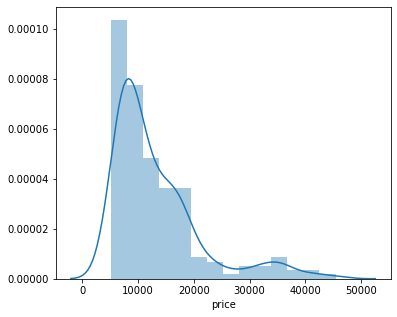

In [36]:
# Checking the normal distribution of the data to  have an idea of how the price is spread out.
rcParams["figure.figsize"]=6,5
sb.distplot(data["price"])

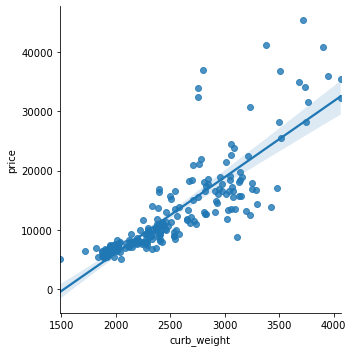

In [37]:
# Plotting a linear regression line based on curb weight.
sb.lmplot("curb_weight","price",data=data)

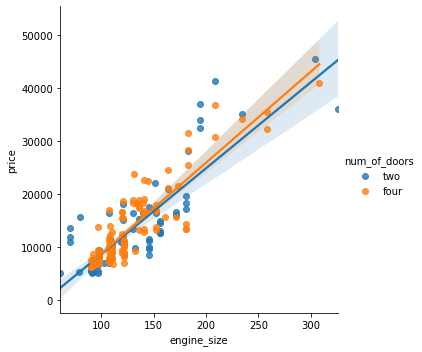

In [38]:
# Plotting  a linear line to understand the relation between engine size and price.
sb.lmplot(x= 'engine_size' , y='price', hue = 'num_of_doors', data=data)

# Creating The model

## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [40]:
# Defining the X and y
X = data1.iloc[:,:-1]
y = data1.price

In [41]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=2)

In [42]:
# Modelling and predicting the r2 score
model= LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
r2_score(y_test,y_predict)

0.8495100521509805

In [43]:
# Calculating all the regression parameters.
import statsmodels.api as sm

X = sm.add_constant(X)

model= sm.OLS(y,X).fit()
prediction = model.predict(X)

print_model = model.summary()
print(print_model)
prediction

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     72.73
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           3.58e-75
Time:                        18:03:16   Log-Likelihood:                -1868.1
No. Observations:                 201   AIC:                             3778.
Df Residuals:                     180   BIC:                             3848.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.814e+04   1.13e+0

0      16068.359706
1      16068.359706
2      19530.742280
3      13056.920627
4      16162.356070
           ...     
196    17338.716987
197    18590.544387
198    22944.752850
199    19984.361751
200    18917.998916
Length: 201, dtype: float64

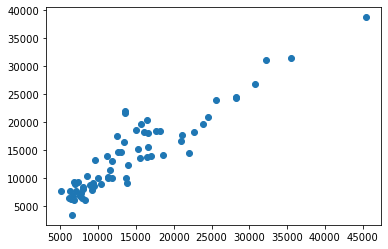

In [44]:
# Plotting the test and predict points
rcParams["figure.figsize"]=6,4
plt.scatter(y_test,y_predict)

In [45]:
# Evaluation 
from sklearn import metrics

In [46]:
metrics.mean_absolute_error(y_test,y_predict)

2380.00386267856

In [47]:
metrics.mean_squared_error(y_test,y_predict)

9494897.822822737

In [48]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

3081.379207890963

# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
model_2 = RandomForestRegressor()

In [51]:
model_2.fit(X_train,y_train)
y_predict = model_2.predict(X_test)
r2_score(y_test,y_predict)

0.8906190684316159

In [52]:
# Applying grid search for obtaining the best parameters for modelling
from sklearn.model_selection import  GridSearchCV

parameters = {"n_estimators":[100,15,500,1000],
               "max_depth":[4,5,6,8],
               "bootstrap":[True,False],
              "random_state":[10,15,20]}

grid_model_2=GridSearchCV(model_2,parameters,cv=5)
grid_model_2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 5, 6, 8],
                         'n_estimators': [100, 15, 500, 1000],
                         'random_state': [10, 15, 20]})

In [53]:
grid_model_2.best_params_

{'bootstrap': True, 'max_depth': 8, 'n_estimators': 1000, 'random_state': 15}

In [54]:
# Final metrics with the best model 
grid_model_2.best_score_

0.9333379965167911

In [55]:
metrics.mean_absolute_error(y_test,y_predict)

1509.685043715847

In [56]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

2330.0472800864

In [57]:
metrics.mean_squared_error(y_test,y_predict)

5429120.327438029